In [146]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import torch
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from torchmetrics.functional import structural_similarity_index_measure, peak_signal_noise_ratio
from tifffile import imwrite
from PIL import Image, ImageDraw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
gt = np.load('Dataset/tissue_152_153_100_z40.npy')

In [141]:
gt.shape

(100, 100, 40)

In [142]:
np.max(gt[:,:,0])

1.5298823529411765

In [51]:
for i in range(25):
    im = gt[:,:,i]
    imwrite('Data/0313/gt/gt_'+str(i)+'.tif',im)

In [58]:
from PIL import Image, ImageDraw
frames = []
for i in range(25):
    im = gt[:,:,i]*256*10
    frames.append(Image.fromarray(im))

frames_one = frames[0]
frames_one.save("Data/gt.gif", format="GIF", append_images=frames, save_all=True, duration=300, loop=0)

(100, 100, 40)


interactive(children=(IntSlider(value=0, description='i', max=39), Output()), _dom_classes=('widget-interact',…

PSNR:
tensor(17.3487, dtype=torch.float64)
SSIM:
tensor(0.8549)


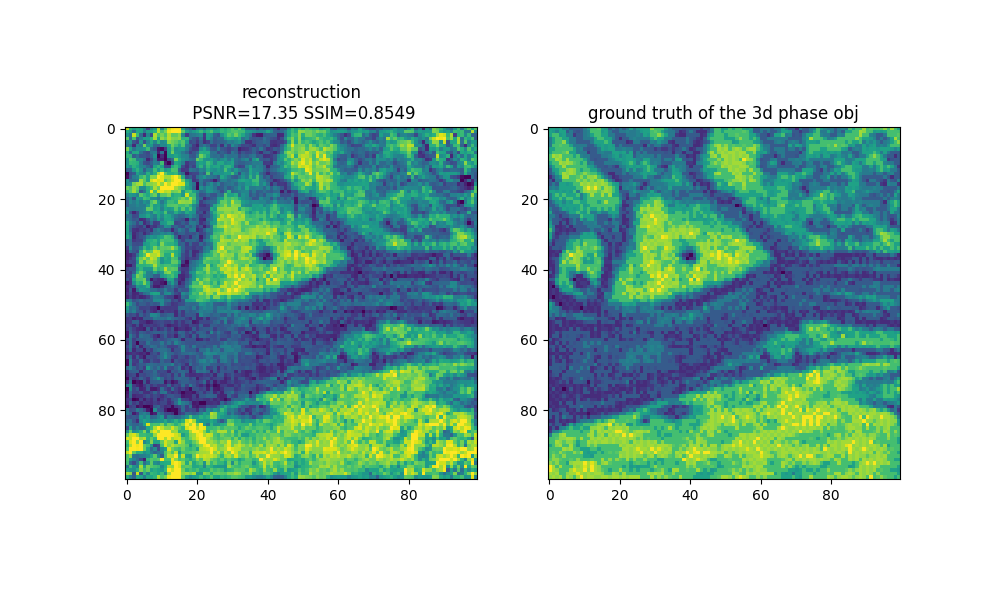

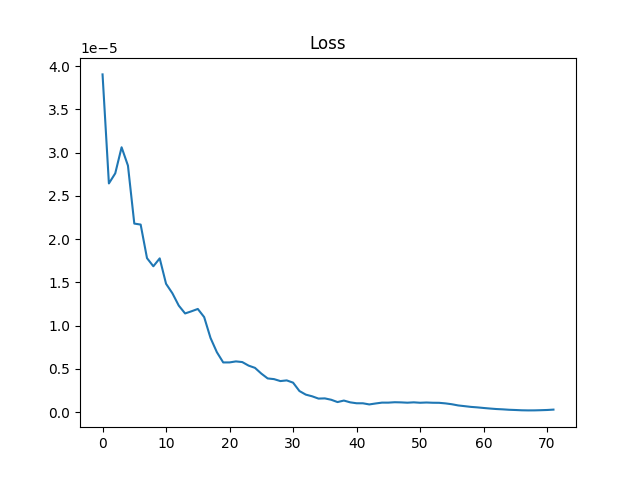

In [143]:
output = np.load('Data/0404/output_1000epoch_num50_bottom_0.02_tissue100_n1.520_1.529_best.npy')
print(output.shape)
# 10: 'Data/0227/output_1000epoch_mse_tv_1e-1.npy'
# 50: 'Data/0227/output_1000epoch_mse_tv_1e-2_num50_range0.01_0.npy'

# Show forward
f, axes = plt.subplots(1, 2, figsize=(10, 6))
frames = []

def init():
    frames.append(axes[0].imshow(output[:,:,0],vmin=1.52,vmax=1.53))
    frames.append(axes[1].imshow(gt[:,:,0],vmin=1.52,vmax=1.53))
    axes[0].set_title('reconstruction\n PSNR=17.35 SSIM=0.8549')
    axes[1].set_title('ground truth of the 3d phase obj')

init()


def updateFrames(i):
    frames[0].set_data(output[:,:, i])
    frames[1].set_data(gt[:,:,i])

interact(updateFrames, i=IntSlider(min=0, max=39, step=1, value=0))


# output_new = np.zeros([100,100,25])
# for i in range(25):
    # output_new[:,:,i] = output[50:150, 50:150, i]

    
psnr = peak_signal_noise_ratio(torch.from_numpy(output[:,:,:]), torch.from_numpy(gt))
ssim = structural_similarity_index_measure(torch.from_numpy(output[np.newaxis,:,:,:]), torch.from_numpy(gt[np.newaxis,:,:,:]))

loss = np.load('Data/0404/loss_list_1000epoch_num50_bottom_0.02_tissue100_n1.520_1.529_best.npy')
f, axes = plt.subplots(1, 1)
axes.set_title('Loss')
plt.plot(loss[0:72])

print('PSNR:')
print(psnr)
print('SSIM:')
print(ssim)


(-0.5, 99.5, 99.5, -0.5)

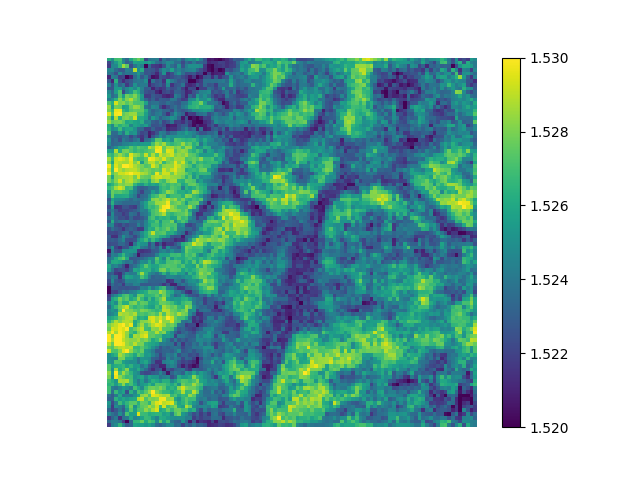

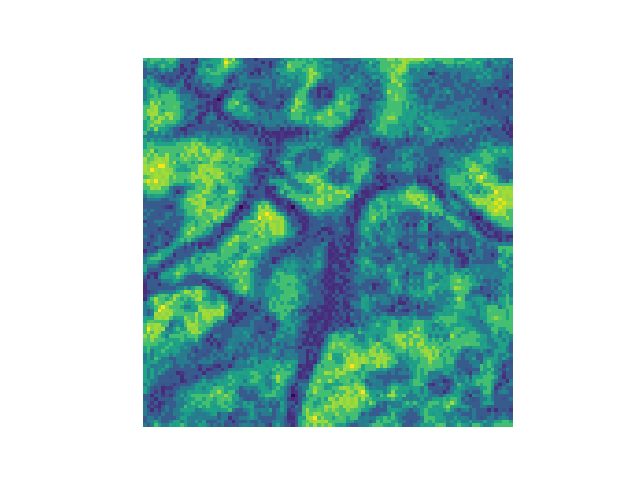

In [137]:
plt.figure()
plt.imshow(output[:,:,9],vmin=1.52,vmax=1.53)
plt.axis('off')
plt.colorbar()
plt.figure()
plt.imshow(gt[:,:,9],vmin=1.52,vmax=1.53)
plt.axis('off')

(-0.5, 39.5, 99.5, -0.5)

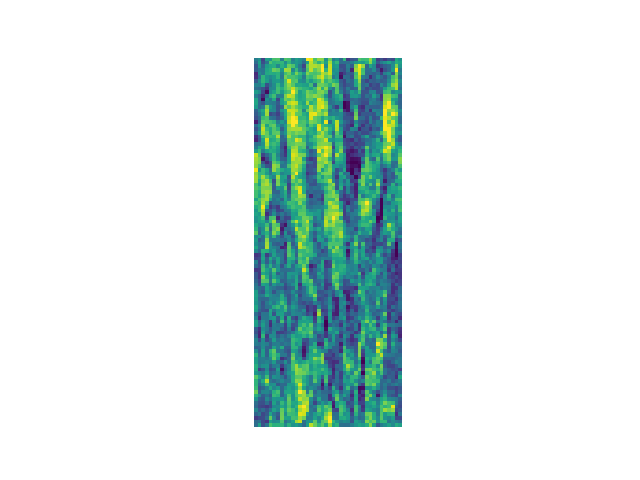

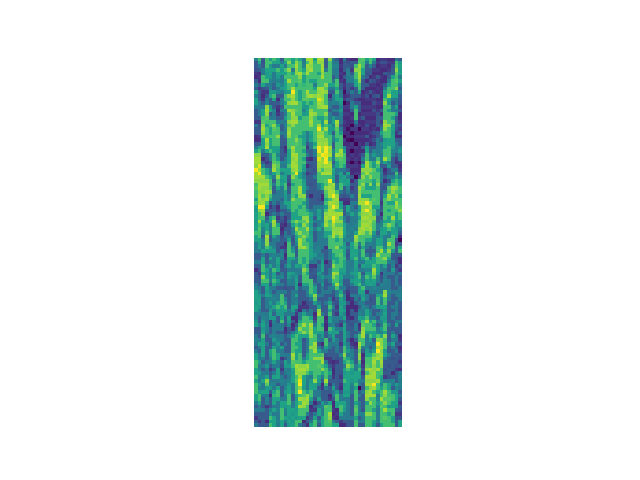

In [107]:
plt.figure()
plt.imshow(output[26,:,:],vmin=1.52,vmax=1.53)
plt.axis('off')
plt.figure()
plt.imshow(gt[26,:,:],vmin=1.52,vmax=1.53)
plt.axis('off')

(-0.5, 39.5, 99.5, -0.5)

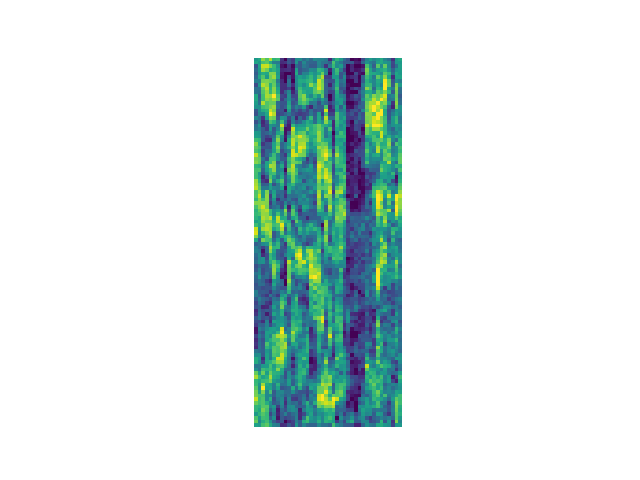

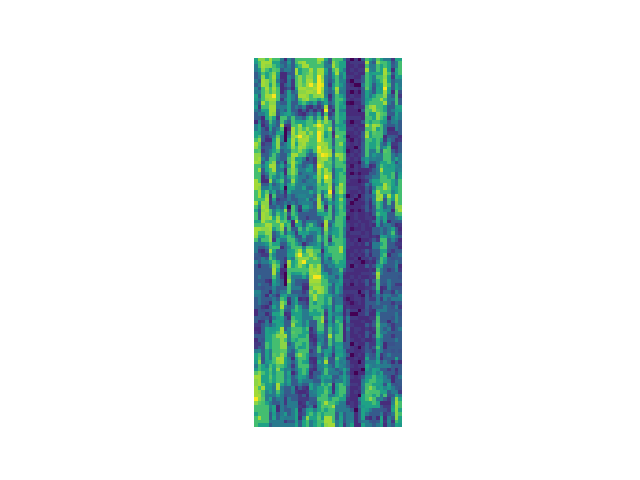

In [108]:
plt.figure()
plt.imshow(output[:,26,:],vmin=1.52,vmax=1.53)
plt.axis('off')
plt.figure()
plt.imshow(gt[:,26,:],vmin=1.52,vmax=1.53)
plt.axis('off')

NameError: name 'solver_obj' is not defined

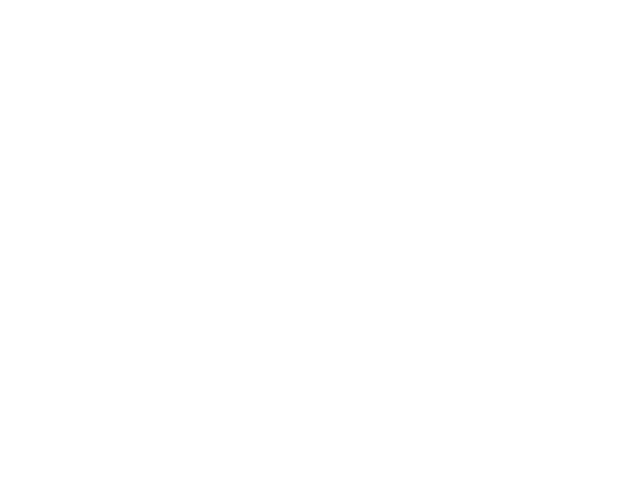

In [36]:
output = np.load('Data/0311/output_500epoch_num50_3d_z0.3_z<1=0.npy')
for i in range(25):
    output[:,:,i] = np.fft.fftshift(output[:, :, i])

plt.figure()
plt.imshow(solver_obj.predictSLM(0.01, 0.01, 4, obj=output, focal_length=-20*dz,device=device))
plt.colorbar()
plt.title('SLM pattern')
# plt.imshow(torch.angle(solver_obj.fields_test.cpu()))

In [131]:
for i in range(40):
    img = (output[:,:,i]-1.52)*70
    if i<10:
        imwrite('Data/best_cosi/im_0'+str(i)+'.tif',img)
    else:
        imwrite('Data/best_cosi/im_'+str(i)+'.tif',img)

In [132]:
(output[:,:,0]-1.52)*80

array([[0.72634697, 0.5116272 , 0.45308113, ..., 0.6058407 , 0.47006607,
        0.5927849 ],
       [0.48748016, 0.42869568, 0.28749466, ..., 0.32197952, 0.7112217 ,
        0.36563873],
       [0.4076767 , 0.3209591 , 0.7341671 , ..., 0.5306244 , 0.26726723,
        0.24402618],
       ...,
       [0.4569626 , 0.4182148 , 0.39506912, ..., 0.38089752, 0.50058365,
        0.44633865],
       [0.67926407, 0.6501007 , 0.22408485, ..., 0.63687325, 0.9690857 ,
        0.66070557],
       [0.4803276 , 0.35121918, 0.2570057 , ..., 0.41832924, 0.7595062 ,
        0.35438538]], dtype=float32)

In [130]:
np.max((output[:,:,0]-1.52)*70)

0.9537184

In [25]:
frames = []
for i in range(25):
    im = output[:,:,i]*50*220
    # im = im.numpy()
    # im = np.fft.fftshift(im)
    frames.append(Image.fromarray(im))

frames_one = frames[0]
frames_one.save("Data/0313/num100_recon.gif", format="GIF", append_images=frames, save_all=True, duration=300, loop=0)

interactive(children=(IntSlider(value=0, description='i', max=24), Output()), _dom_classes=('widget-interact',…

PSNR:
tensor(27.3347)
SSIM:
tensor(0.7221)


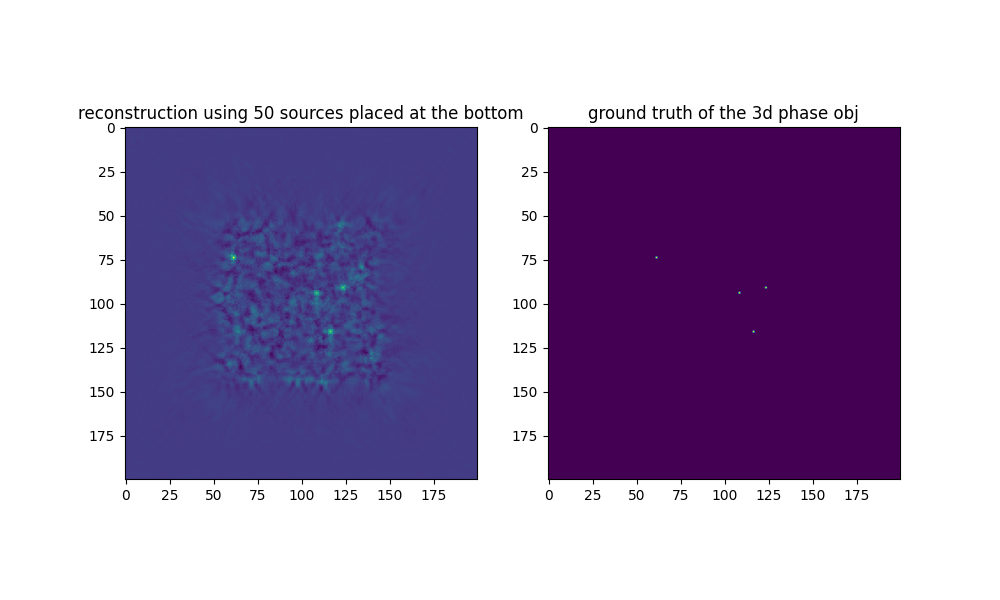

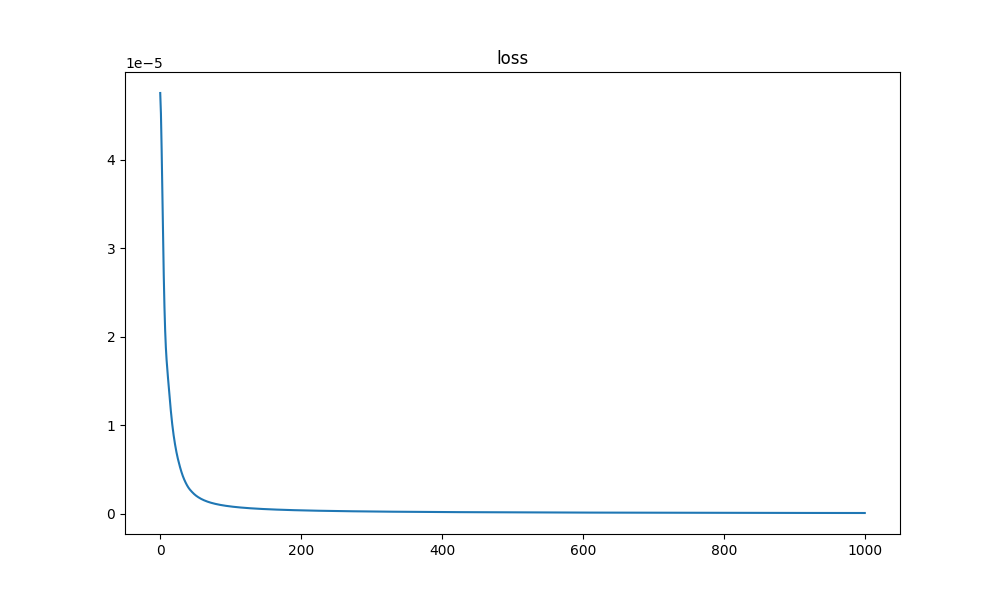

In [31]:
output = np.load('Data/0227/output_1000epoch_mse_tv_1e-2_num50_range0.01_0.npy')

# Show forward
f, axes = plt.subplots(1, 2, figsize=(10, 6))
frames = []

def init():
    frames.append(axes[0].imshow(output[:,:,0]))
    frames.append(axes[1].imshow(gt[:,:,0]))
    axes[0].set_title('reconstruction using 50 sources placed at the bottom')
    axes[1].set_title('ground truth of the 3d phase obj')

init()

def updateFrames(i):
    frames[0].set_data(output[:, :, i])
    frames[1].set_data(gt[:,:,i])

interact(updateFrames, i=IntSlider(min=0, max=24, step=1, value=0))

psnr = peak_signal_noise_ratio(torch.from_numpy(output), torch.from_numpy(gt))
ssim = structural_similarity_index_measure(torch.from_numpy(output[np.newaxis,:,:,:]), torch.from_numpy(gt[np.newaxis,:,:,:]))
print('PSNR:')
print(psnr)
print('SSIM:')
print(ssim)

loss = np.load('Data/0227/loss_list_1000epoch_mse_tv_1e-2_num50_range0.01_0.npy')
f, axes = plt.subplots(1, 1, figsize=(10, 6))
axes.set_title('loss')
plt.plot(loss)

interactive(children=(IntSlider(value=0, description='i', max=24), Output()), _dom_classes=('widget-interact',…

<function __main__.updateFrames(i)>

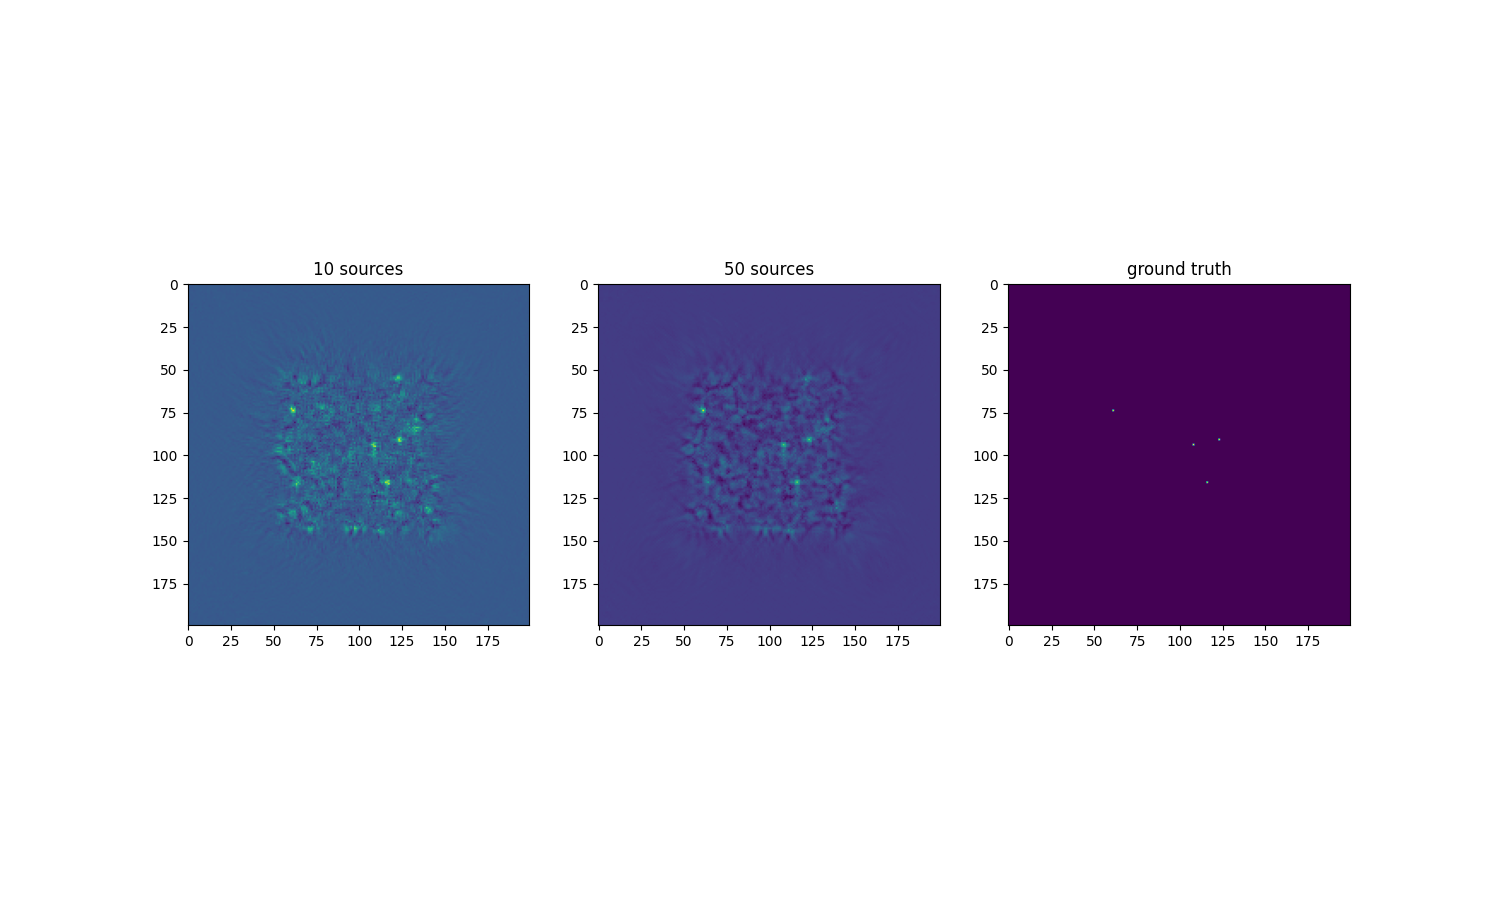

In [32]:
output_10 = np.load('Data/0227/output_1000epoch_mse_tv_1e-1.npy')
output_50 = np.load('Data/0227/output_1000epoch_mse_tv_1e-2_num50_range0.01_0.npy')
# Comparison between numbers
f, axes = plt.subplots(1, 3, figsize=(15, 9))
frames = []

def init():
    frames.append(axes[0].imshow(output_10[:,:,0]))
    frames.append(axes[1].imshow(output_50[:,:,0]))
    frames.append(axes[2].imshow(gt[:,:,0]))
    axes[0].set_title('10 sources')
    axes[1].set_title('50 sources')
    axes[2].set_title('ground truth')

init()

def updateFrames(i):
    frames[0].set_data(output_10[:, :, i])
    frames[1].set_data(output_50[:,:,i])
    frames[2].set_data(gt[:,:,i])

interact(updateFrames, i=IntSlider(min=0, max=24, step=1, value=0))

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.io as sio

na_list = sio.loadmat("Dataset/na_list_3D_num50_025.mat")
fx_illu_list = na_list["na_list_3D_num50_025"][:, 0] * 0.04   #paraxial condition
fy_illu_list = na_list["na_list_3D_num50_025"][:, 1] * 0.04
fz_illu_list = na_list["na_list_3D_num50_025"][:, 2] * 0.6     #z layer at the z=0

In [61]:
fz_illu_list

array([ 6.47120741, 13.65971392,  2.72770542,  3.95704375,  2.18308471,
        2.04102838, 13.03938311,  8.69556881,  8.24790303,  2.17432197,
       12.79546677,  9.33082697,  5.26428571,  7.6987431 ,  6.02712051,
        1.13950038,  3.5987423 ,  1.84978402,  2.75861682,  3.59928788,
        6.25900604,  0.74481645, 13.54074165, 14.17180785,  7.36296139,
        7.33878958,  5.06579115, 13.5008077 ,  5.53870172,  1.66804133,
       11.70378102,  5.84608255,  3.62536929,  6.05868218,  1.44681788,
        1.97959939, 14.13075886, 14.3420181 ,  8.62812893,  0.89669314,
        3.5216987 ,  5.29737857, 12.3179106 ,  0.23105156,  0.64535702,
        2.53485044,  9.73673212, 10.97583578,  9.71618945,  6.7638556 ])

In [47]:
zs

array([ 32.74805745,  22.75875266,  29.21928754,  -1.83729729,
       -26.26101543,   5.86913417,  31.15648046,  31.25446839])

In [147]:
np.random.randn(8)

array([ 0.7886811 , -0.66205452,  1.43793865, -0.37159298, -0.70658577,
       -0.44366018,  0.9288529 ,  0.87533432])

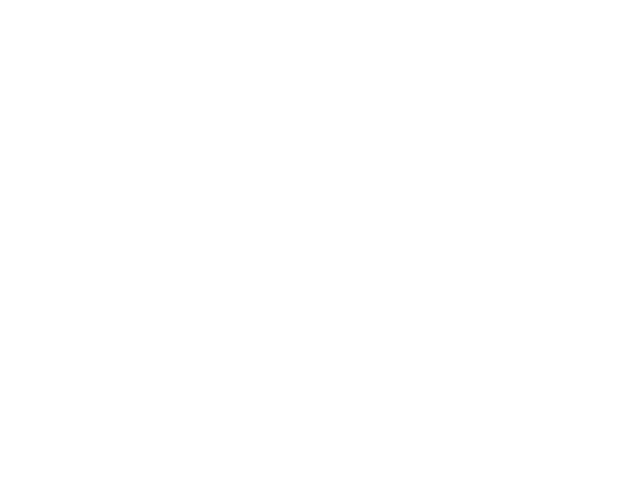

In [148]:
%matplotlib widget
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(1,1,1)
plt.show()


In [149]:
xs1 = np.random.randint(30,40,100)

In [150]:
xs1

array([38, 33, 36, 31, 39, 30, 30, 36, 30, 38, 38, 30, 32, 35, 39, 32, 39,
       36, 34, 37, 33, 34, 32, 37, 34, 31, 36, 32, 35, 30, 35, 39, 36, 36,
       37, 31, 30, 33, 32, 35, 35, 34, 35, 38, 34, 37, 32, 30, 39, 36, 33,
       30, 32, 32, 37, 38, 32, 38, 30, 32, 34, 36, 34, 34, 37, 33, 30, 38,
       35, 33, 39, 31, 30, 35, 30, 30, 37, 31, 33, 34, 38, 39, 30, 37, 39,
       39, 35, 35, 37, 32, 37, 30, 30, 33, 38, 33, 32, 38, 39, 32])

In [151]:
200*fx_illu_list[0:8]

NameError: name 'fx_illu_list' is not defined

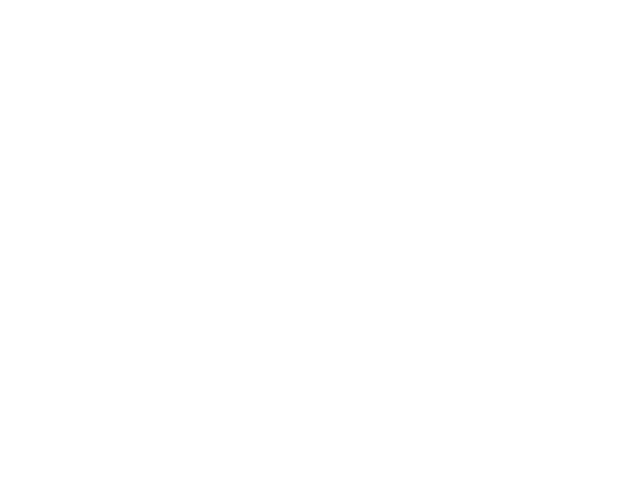

In [152]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

xs1 = np.random.randint(30,40,100)
ys1 = np.random.randint(20,30,100)
zs1 = np.random.randint(10,20,100)
xs2 = np.random.randint(50,60,100)
ys2 = np.random.randint(30,40,100)
zs2 = np.random.randint(50,70,100)
xs3 = np.random.randint(10,30,100)
ys3 = np.random.randint(40,50,100)
zs3 = np.random.randint(40,50,100)

# 方式1：设置三维图形模式
fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。

ax.scatter(xs1,ys1,zs1) # 画出(xs1,ys1,zs1)的散点图。
ax.scatter(xs2,ys2,zs2,c='r',marker='^')
ax.scatter(xs3,ys3,zs3,c='g',marker='*')

ax.set_xlabel('X label') # 画出坐标轴
ax.set_ylabel('Y label')
ax.set_zlabel('Z label')

plt.show()

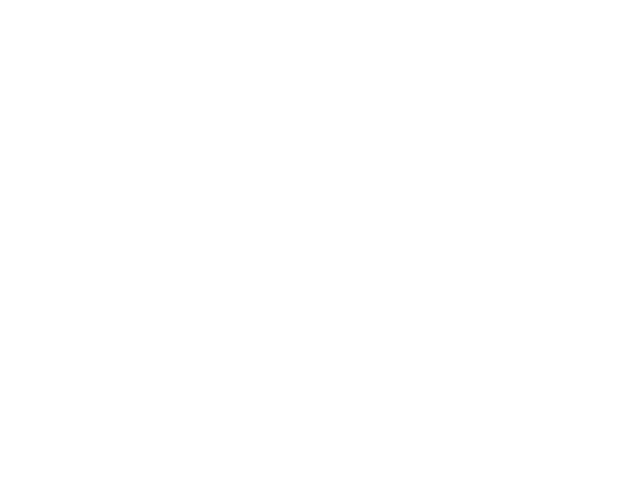

In [144]:

# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating random dataset
xs = [14, 24, 43, 47, 54, 66, 74, 89, 12,
      44, 1, 2, 3, 4, 5, 9, 8, 7, 6, 5]
  
ys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 3,
      5, 2, 4, 1, 8, 7, 0, 5]
  
zs = [9, 6, 3, 5, 2, 4, 1, 8, 7, 0, 1, 2, 
      3, 4, 5, 6, 7, 8, 9, 0]
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')
  
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
  
# displaying the plot
plt.show()

In [78]:
phantom_coordinates = sio.loadmat("gaussian_phantom.mat")
img = phantom_coordinates['vol_new_smooth']
img = np.array(img)

In [79]:
for i in range(120):
    for j in range(120):
        for k in range(50):
            img[i,j,k]*=1.5
            if img[i,j,k] > 0.01:
                img[i,j,k] += 1.3
            else:
                img[i,j,k] += 1

In [68]:
from PIL import Image, ImageDraw
frames = []
for i in range(50):
    im = img[:,:,i]
    frames.append(Image.fromarray(im))

frames_one = frames[0]
frames_one.save("Data/guassian.gif", format="GIF", append_images=frames, save_all=True, duration=300, loop=0)

interactive(children=(IntSlider(value=0, description='i', max=49), Output()), _dom_classes=('widget-interact',…

<function __main__.updateFrames(i)>

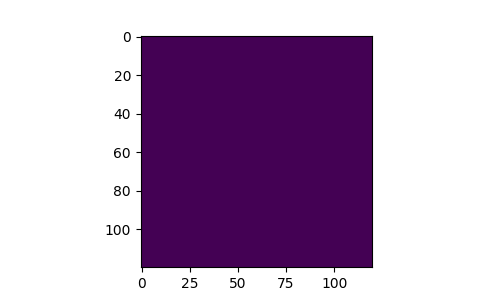

In [82]:
# Show forward
f, axes = plt.subplots(1, 1, figsize=(5, 3))
frames = []

def init():
    frames.append(axes.imshow(img[:,:,0],vmin=1,vmax=1.4))

init()

def updateFrames(i):
    frames[0].set_data(img[:, :, i])

interact(updateFrames, i=IntSlider(min=0, max=49, step=1, value=0))

In [32]:
np.max(img[:,:,49])

0.0

In [66]:
for i in range(50):
    im = img[:,:,i]
    if i<10:
        imwrite('Data/gaussian_tif/im_0'+str(i)+'.tif',im)
    else:
        imwrite('Data/gaussian_tif/im_'+str(i)+'.tif',im)

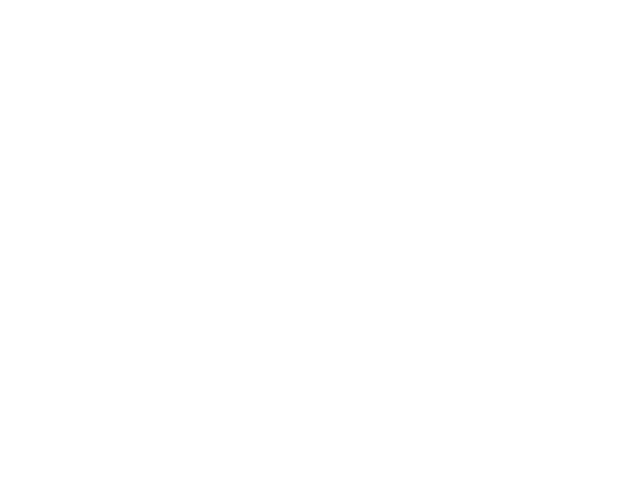

In [153]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

xs1 = np.random.randint(30,40,100)
ys1 = np.random.randint(20,30,100)
zs1 = np.random.randint(10,20,100)
xs2 = np.random.randint(50,60,100)
ys2 = np.random.randint(30,40,100)
zs2 = np.random.randint(50,70,100)
xs3 = np.random.randint(10,30,100)
ys3 = np.random.randint(40,50,100)
zs3 = np.random.randint(40,50,100)

# 方式1：设置三维图形模式
fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。

ax.scatter(xs1,ys1,zs1) # 画出(xs1,ys1,zs1)的散点图。
ax.scatter(xs2,ys2,zs2,c='r',marker='^')
ax.scatter(xs3,ys3,zs3,c='g',marker='*')

ax.set_xlabel('X label') # 画出坐标轴
ax.set_ylabel('Y label')
ax.set_zlabel('Z label')

plt.show()

TypeError: gca() got an unexpected keyword argument 'projection'

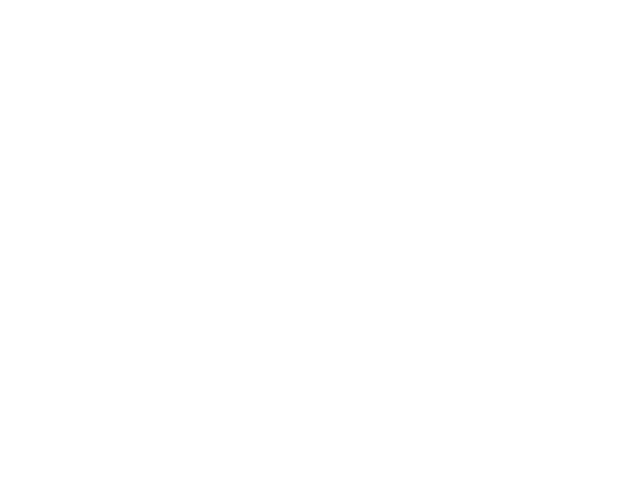

In [154]:
# 含噪声曲线图
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# 设置图例字号
mpl.rcParams['legend.fontsize'] = 10

# 方式2：设置三维图形模式
fig = plt.figure()
ax = fig.gca(projection='3d')

# 测试数据
x = np.linspace(-4 * np.pi, 4 * np.pi, 30) 
y = x + np.random.randn(x.shape[-1]) * 2.5
z = x * x 

# 绘制图形
ax.plot(x, y, z, label='parametric curve')

# 显示图例
ax.legend()

# 显示图形
plt.show()